# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [1]:
import tensorflow as tf

## Get the dataset

In [2]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [4]:
# Pre processing 
print(X_train.shape,Y_train.shape )

(8000, 28, 28) (8000,)


## Visualize the dataset
Print some images with labels.

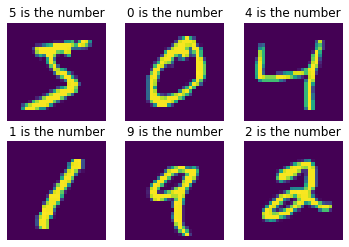

In [5]:
import matplotlib.pyplot as plt

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i])
  plt.title("{} is the number".format(y_train[i]))
  plt.axis('off')

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [6]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)

print( np.array((unique, counts)).T)

[[  0 770]
 [  1 883]
 [  2 827]
 [  3 819]
 [  4 795]
 [  5 705]
 [  6 786]
 [  7 830]
 [  8 793]
 [  9 792]]


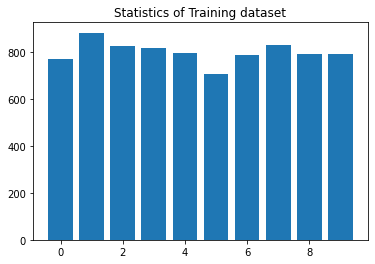

In [8]:
#for training dataset
plt.bar(unique,counts)
plt.title("Statistics of Training dataset")
plt.show()

<function matplotlib.pyplot.show>

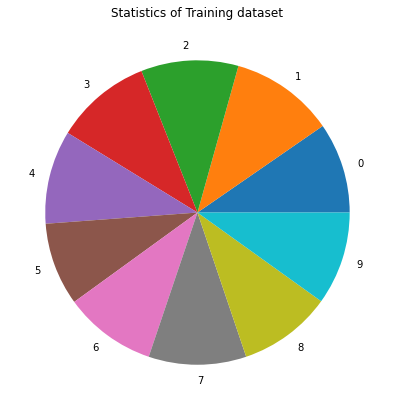

In [9]:
#for training data set
fig = plt.figure(figsize=(10,7))
plt.title("Statistics of Training dataset")
plt.pie(counts, labels=unique)
plt.show

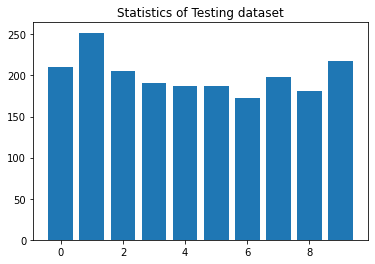

In [10]:
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts)
plt.title("Statistics of Testing dataset")
plt.show()

<function matplotlib.pyplot.show>

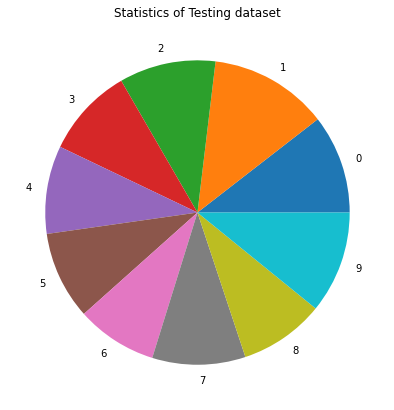

In [11]:
unique, counts = np.unique(Y_test, return_counts=True)
fig = plt.figure(figsize=(10,7))
plt.title("Statistics of Testing dataset")
plt.pie(counts, labels=unique)
plt.show

## Model

In [12]:
# model building
# Fit the model on the training data (specify validation_split, read about validation if new to you)

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation=tf.nn.softmax))


In [13]:
# Compile the model (add optimizers and metrics)

# Fit the model on the training data (specify validation_split, read about validation if new to you)

model.compile(optimizer='adam',loss=sparse_categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 18s 4ms/step - loss: 0.3669 - accuracy: 0.8992 - val_loss: 0.1660 - val_accuracy: 0.9496
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9656 - val_loss: 0.0881 - val_accuracy: 0.9738
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0653 - val_accuracy: 0.9817
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.0797 - val_accuracy: 0.9777
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.0690 - val_accuracy: 0.9813
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0563 - accuracy: 0.9841 - val_loss: 0.0742 - val_accuracy: 0.9818
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0531 - accuracy: 0.9845 - val_loss: 0.0739 - val_accuracy

In [17]:
import pandas as pd
df=pd.DataFrame(history.history)
df['epoch']=history.epoch
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.366949,0.899208,0.165977,0.949583,0
1,0.115637,0.965646,0.088118,0.973833,1
2,0.086524,0.974000,0.065300,0.981667,2
3,0.075641,0.977542,0.079745,0.977667,3
4,0.060661,0.982396,0.069022,0.981333,4
5,0.056282,0.984125,0.074186,0.981750,5
6,0.053078,0.984458,0.073908,0.981000,6
7,0.048656,0.986208,0.069737,0.981417,7
8,0.047331,0.986625,0.060135,0.985583,8
9,0.044938,0.987417,0.069583,0.985917,9


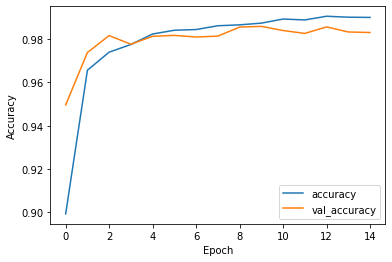

In [18]:

plt.plot(df['epoch'],df['accuracy'],label='accuracy')
plt.plot(df['epoch'],df['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

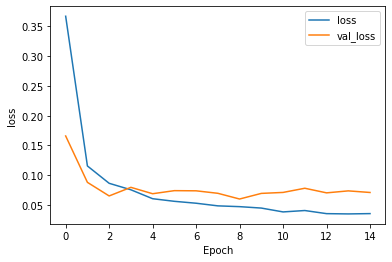

In [19]:
plt.plot(df['epoch'],df['loss'],label='loss')
plt.plot(df['epoch'],df['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

## Predict some images
Print the image along with its label (true value) and predicted value.

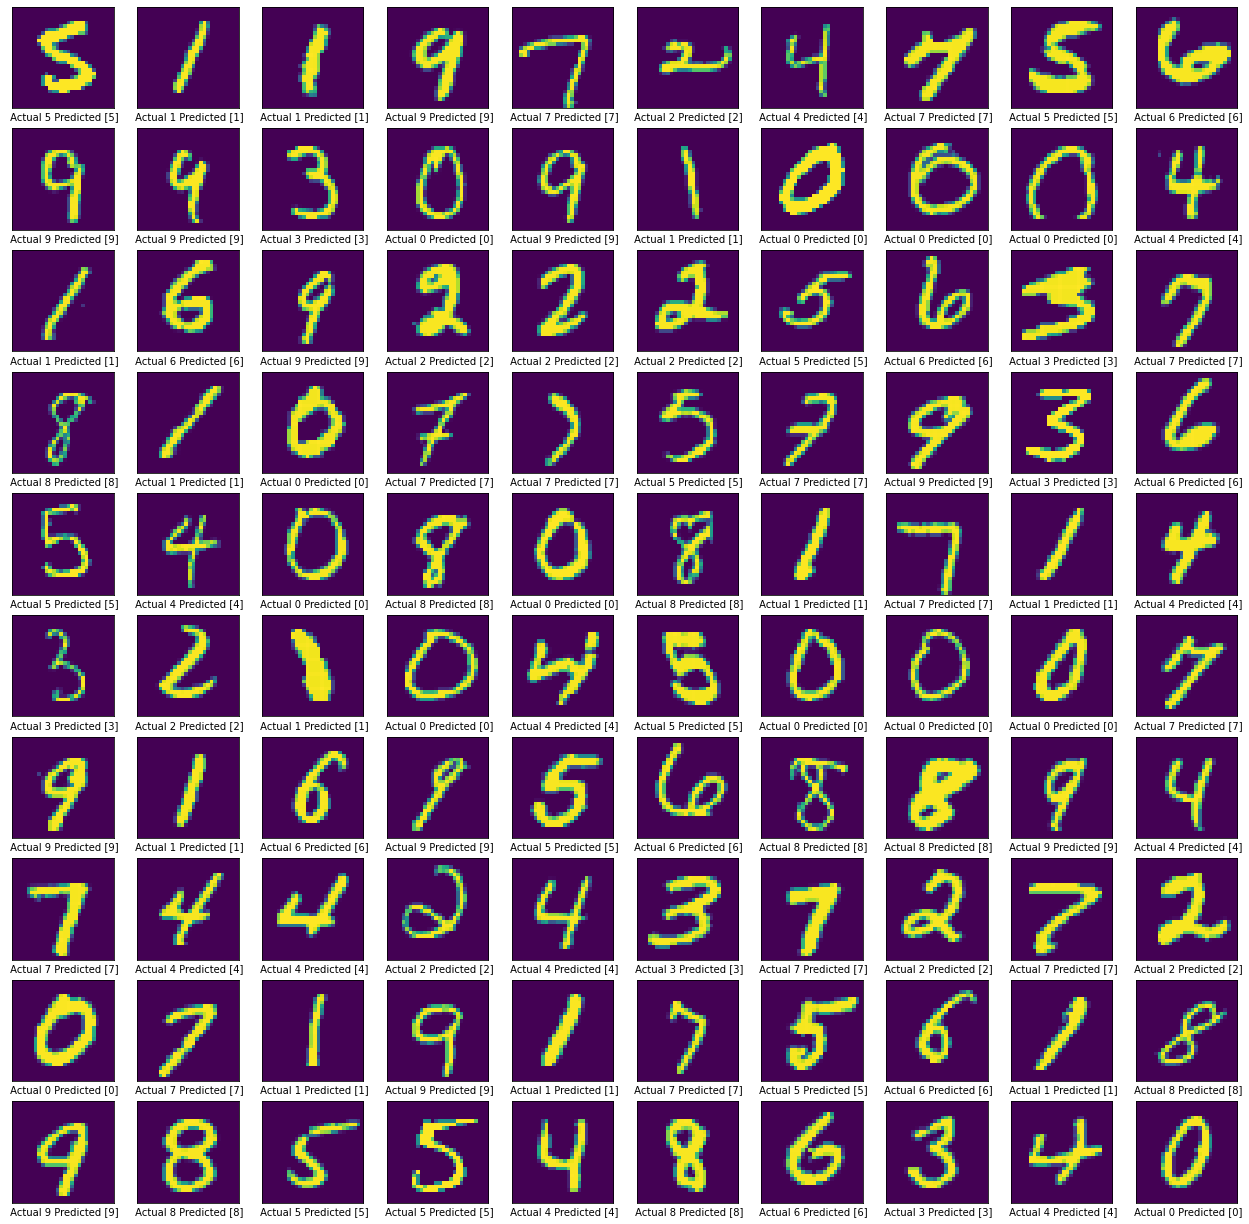

In [26]:
# Your code
digt=model.predict(X_test[:100])
arr=[]
for i in range(100):
  n=np.where(digt[i]==max(digt[i]))
  arr.append(n)
plt.figure(figsize=(22,22))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(f" Actual {Y_test[i]} Predicted {arr[i][0]}")
    plt.xticks([])
    plt.yticks([])